In [1]:
import pandas as pd
import numpy as np
import sys
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from matplotlib import pyplot as plt
from IPython.display import Image
import sklearn.model_selection as model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

data = pd.read_csv('dataset.csv',header=None,names=col_names)
print(data.shape)

(494021, 42)


In [3]:
data


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,normal.


In [4]:
data=data.dropna()
print('Null values in dataset are',len(data[data.isnull().any(1)]))

Null values in dataset are 0


In [5]:
train, test = model_selection.train_test_split(data,test_size=0.2, random_state=42)

In [6]:
print(data.shape)
print(train.shape)
print(test.shape)

(494021, 42)
(395216, 42)
(98805, 42)


In [7]:
train_y=train.loc[:,('label')]
test_y=test.loc[:,('label')]
train_x=train.drop(['label'],axis=1)
test_x=test.drop(['label'],axis=1)

In [8]:
train_y=pd.DataFrame({'label':train_y[:]})
test_y=pd.DataFrame({'label':test_y[:]})
train_x.dtypes#convert the object datatypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [9]:
def preprocess(train_x,train_y):
  #converting categorical features to numbers
  cat_columns = train_x.select_dtypes(['object']).columns
  train_x[cat_columns] = train_x[cat_columns].astype('category')
  train_x.loc[:, cat_columns] = train_x[cat_columns].apply(lambda x: x.cat.codes)
  #converting categorical label to number
  val=list(set(list(train_y['label'].values)))
  val.remove('normal.')
  train_y=train_y.replace('normal.',1)
  train_y=train_y.replace(val,0)
  #Standardising the input features-mean-0, std=1
  ss = StandardScaler()
  train_x = pd.DataFrame(ss.fit_transform(train_x),columns = train_x.columns)
  return train_x,train_y

In [10]:
train_x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
133888,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.0
67704,0,tcp,private,S0,0,0,0,0,0,0,...,255,10,0.04,0.07,0.00,0.00,1.00,1.00,0.00,0.0
391027,0,tcp,private,S0,0,0,0,0,0,0,...,255,24,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.0
372089,0,tcp,http,REJ,0,0,0,0,0,0,...,8,8,1.00,0.00,0.12,0.00,0.00,0.00,1.00,1.0
460597,0,tcp,private,REJ,0,0,0,0,0,0,...,255,7,0.03,0.07,0.00,0.00,0.00,0.00,1.00,1.0
224913,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.0
491136,0,udp,private,SF,105,147,0,0,0,0,...,255,242,0.95,0.01,0.00,0.00,0.00,0.00,0.00,0.0
123395,0,tcp,private,S0,0,0,0,0,0,0,...,255,4,0.02,0.08,0.00,0.00,1.00,1.00,0.00,0.0
365957,0,tcp,private,S0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,1.00,1.00,0.00,0.0
361332,0,tcp,private,S0,0,0,0,0,0,0,...,255,17,0.07,0.07,0.00,0.00,1.00,1.00,0.00,0.0


In [11]:
train_x,train_y=preprocess(train_x,train_y)

In [12]:
train_x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.067947,-0.812601,-0.696083,0.514699,-0.002123,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,...,0.347993,0.626025,0.599852,-0.283168,0.828326,-0.158220,-0.465094,-0.463831,-0.251845,-0.249178
1,-0.067947,0.923971,1.593669,-1.262278,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,...,0.347993,-1.683737,-1.736389,0.359299,-1.248665,-0.158220,2.159981,2.159070,-0.251845,-0.249178
2,-0.067947,0.923971,1.593669,-1.262278,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,...,0.347993,-1.551751,-1.614710,0.175737,-1.248665,-0.158220,2.159981,2.159070,-0.251845,-0.249178
3,-0.067947,0.923971,-0.105179,-3.039254,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,...,-3.466449,-1.702592,0.599852,-0.283168,-0.999426,-0.158220,-0.465094,-0.463831,4.088139,4.100256
4,-0.067947,0.923971,1.593669,-3.039254,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,...,0.347993,-1.712020,-1.760725,0.359299,-1.248665,-0.158220,-0.465094,-0.463831,4.088139,4.100256
5,-0.067947,-0.812601,-0.696083,0.514699,-0.002123,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,...,0.347993,0.626025,0.599852,-0.283168,0.828326,-0.158220,-0.465094,-0.463831,-0.251845,-0.249178
6,-0.067947,2.660543,1.593669,0.514699,-0.002962,-0.022404,-0.00729,-0.048225,-0.002875,-0.044023,...,0.347993,0.503467,0.478173,-0.191387,-1.248665,-0.158220,-0.465094,-0.463831,-0.251845,-0.249178
7,-0.067947,0.923971,1.593669,-1.262278,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,...,0.347993,-1.740303,-1.785061,0.451079,-1.248665,-0.158220,2.159981,2.159070,-0.251845,-0.249178
8,-0.067947,0.923971,1.593669,-1.262278,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,...,0.347993,-1.712020,-1.760725,0.267518,-1.248665,-0.158220,2.159981,2.159070,-0.251845,-0.249178
9,-0.067947,0.923971,1.593669,-1.262278,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,...,0.347993,-1.617744,-1.663381,0.359299,-1.248665,-0.158220,2.159981,2.159070,-0.251845,-0.249178


In [13]:
train_y

,label
133888,0
67704,0
391027,0
372089,1
460597,0
224913,0
491136,1
123395,0
365957,0
361332,0


In [14]:
test_x,test_y=preprocess(test_x,test_y)

In [15]:
#FIT TREE 
tree = tree.DecisionTreeClassifier()
tree = tree.fit(train_x, train_y)
print("The test score is ",tree.score(test_x,test_y)*100,"%")

The test score is  83.75588279945347 %


In [16]:
def confusion_matrix_func(Y_test, y_test_pred):
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['Bad_Connection','Good_Connection']
    plt.figure(figsize=(12,12))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g',xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

def model(model_name, X_train, Y_train, X_test, Y_test):
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    y_tr_pred = model_name.predict(X_train)    
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    print('Performance metrics:')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    print('Mean Accuracy is:')
    print(accuracy_score(Y_test,y_test_pred))
    return
    

In [17]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500],'max_leaf_nodes':[100,300,700,1000]}
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  6.3min finished


Completed
Time taken: 0:06:26.599061
Prediction on test data:
Completed
Time taken: 0:00:00.023965
Confusion Matrix is:


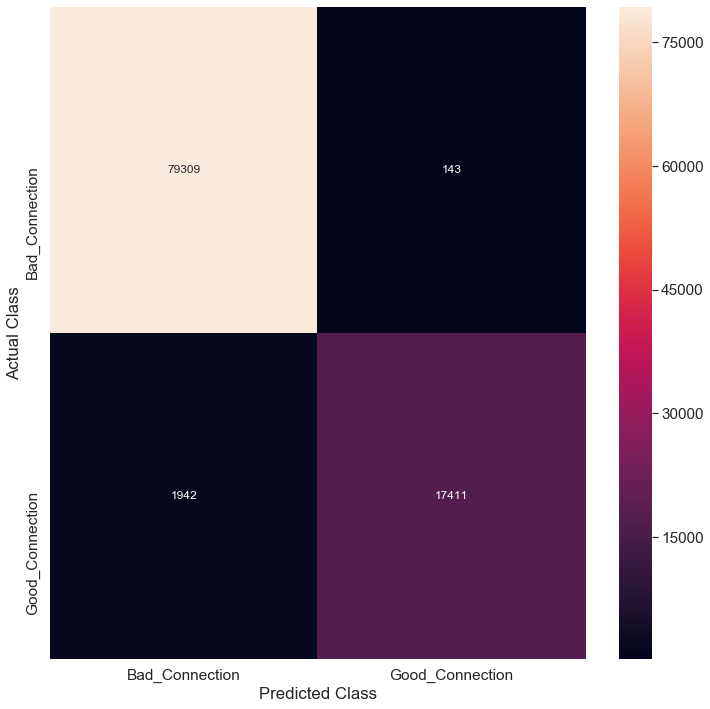

Performance metrics:
Precision score is:
0.9791846886308896
Recall score is:
0.978897829057234
F1-score is:
0.9785016402630768
Mean Accuracy is:
0.978897829057234


In [18]:
model(decision_tree_grid,train_x,train_y, test_x,test_y)